# Case Study – Customer Churn
✔ A Telecom company is facing substantial churn, where a lot of its customers are cancelling the 
current service after using it for a certain period

✔ It’s important for the telecom company to retain its customers not only to maintain a good flow of 
revenues, but also to avoid incurring costs to acquire new customers (as a compensatory 
measure), which can often be multiple times of the cost of customer retention. Also, often any 
churned customer migrates to the competition in search of better alternatives, which every 
telecom client wants to minimize to the extent possible

✔ For reducing a future churn it’s important to understand what caused the customers to leave in 
the past and whether there are any relevant factors, which if tracked on-time can indicate taking 
appropriate actions to avoid a future churn.

✔ The Telecom company has made some information available for a potential analysis

# Business Objective
✔ The Telecom Co. needs assistance in performing some quantitative analysis on the provided dataset and 
generate some relevant insights. This should guide the Co. to first understand what factors are potentially 
causing churn and by taking what actions can the churn be minimized

✔ Using the available information what analysis would you perform that can help here ?


In [318]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [319]:
os.chdir(r'F:\Casestudymod2')
os.listdir()

['06 Org Profiling Case Study Data.xlsx',
 '07 Customer Churn Case Study Data.xlsx',
 '07 Customer Churn Case Study.pptx.pdf',
 'Deliverables Instructions and Template-20220302',
 'Group 09 - Phase 01 and 02 Deliverables.docx.pdf']

In [320]:
df=pd.read_excel('07 Customer Churn Case Study Data.xlsx',sheet_name='Data')
df

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1,0
...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9,0
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6,0
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1,0
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0,0


In [321]:
df.num_cs_calls.value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
8       2
9       2
Name: num_cs_calls, dtype: int64

In [322]:
df.shape

(3333, 11)

In [323]:
df.columns

Index(['weeks_active', 'conrenew_flag', 'dataplan_flag', 'data_usage',
       'num_cs_calls', 'avg_talk_time', 'avg_calls', 'mth_bill', 'overagefee',
       'roam_mins', 'churn_flag'],
      dtype='object')

# Section 02: Data Health Review


# A. Observe Univariate distributions on both Object and Numeric variable

In [324]:
# Do the variables get read in Python in the right format (Integer, Float, Boolean, Date,Object)?
# List down what corrective steps were taken (if any) for the affected variables?

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weeks_active   3333 non-null   int64  
 1   conrenew_flag  3333 non-null   int64  
 2   dataplan_flag  3333 non-null   int64  
 3   data_usage     3333 non-null   float64
 4   num_cs_calls   3333 non-null   int64  
 5   avg_talk_time  3333 non-null   float64
 6   avg_calls      3333 non-null   int64  
 7   mth_bill       3333 non-null   float64
 8   overagefee     3333 non-null   float64
 9   roam_mins      3333 non-null   float64
 10  churn_flag     3333 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [326]:
# Observation 
## The variables get read in Python in the right format (Integer, Float, Boolean)

In [327]:
# Do any variables have missing values? Create a list of variables for which you found
# missing values and what % values in these variables were affected?

In [328]:
df.isnull().sum()

weeks_active     0
conrenew_flag    0
dataplan_flag    0
data_usage       0
num_cs_calls     0
avg_talk_time    0
avg_calls        0
mth_bill         0
overagefee       0
roam_mins        0
churn_flag       0
dtype: int64

In [329]:
# Observation 
## No variable has the missing values 

In [330]:
# Do any variables have outliers? Use suitable plots to show the outliers for all these
# affected variables

In [331]:
df.describe(percentiles=[0.01,0.05, 0.25, 0.75, 0.95, 0.99]).T.round()

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
weeks_active,3333.0,101.0,40.0,1.0,12.0,35.0,74.0,101.0,127.0,167.0,195.0,243.0
conrenew_flag,3333.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
dataplan_flag,3333.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
data_usage,3333.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,5.0
num_cs_calls,3333.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,6.0,9.0
avg_talk_time,3333.0,180.0,54.0,0.0,52.0,90.0,144.0,179.0,216.0,271.0,305.0,351.0
avg_calls,3333.0,100.0,20.0,0.0,54.0,67.0,87.0,101.0,114.0,133.0,146.0,165.0
mth_bill,3333.0,56.0,16.0,14.0,26.0,33.0,45.0,54.0,66.0,88.0,98.0,111.0
overagefee,3333.0,10.0,3.0,0.0,4.0,6.0,8.0,10.0,12.0,14.0,16.0,18.0
roam_mins,3333.0,10.0,3.0,0.0,3.0,6.0,8.0,10.0,12.0,15.0,17.0,20.0


In [332]:
# Observation 
## All the variables does'nt exhibit any outliers

# unique values %

In [333]:
u=df.columns
u

Index(['weeks_active', 'conrenew_flag', 'dataplan_flag', 'data_usage',
       'num_cs_calls', 'avg_talk_time', 'avg_calls', 'mth_bill', 'overagefee',
       'roam_mins', 'churn_flag'],
      dtype='object')

In [334]:
for i in u:
    print(i,'------',round((df[i].nunique()/df.shape[0])*100,3))

weeks_active ------ 6.361
conrenew_flag ------ 0.06
dataplan_flag ------ 0.06
data_usage ------ 5.221
num_cs_calls ------ 0.3
avg_talk_time ------ 50.015
avg_calls ------ 3.57
mth_bill ------ 18.812
overagefee ------ 30.723
roam_mins ------ 4.86
churn_flag ------ 0.06


In [335]:
# Are there any variables that require cleaning (extra spaces, special characters,
# unexpected values, etc.) or replacement of values (e.g., Yes/No to 1/0)? List down all
# such variables and the kind of cleaning required


In [336]:
df.head()

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0


In [337]:
# Are there any duplicate records in the data? If yes, how many

In [338]:
df.duplicated().sum()

0

In [339]:
# Observation
## There are no duplicate records in the data

# Section 3

## Analysis on weeks since Customers has been active

In [340]:
df.weeks_active.describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: weeks_active, dtype: float64

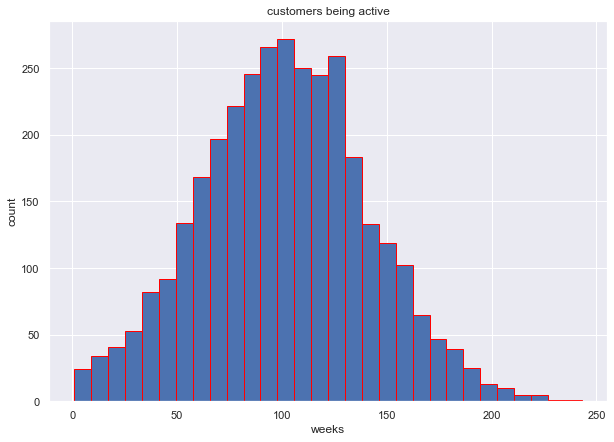

In [341]:
plt.figure(figsize=(10,7))
plt.hist(df['weeks_active'],edgecolor='red',bins=30)
plt.xlabel('weeks')
plt.ylabel('count')
plt.title('customers being active')
plt.show()

In [342]:
# Observation
## The maximum number of weeks that a customer being active is 243 weeks
## The minimum number of weeks that a customer being active is 1 week
## And the more number of weeks that the customers being active is in between 60 and 140 weeks

## Analysis on customers who renewed the contract

In [343]:
r=df.conrenew_flag.value_counts(normalize=True)
r

1    0.90309
0    0.09691
Name: conrenew_flag, dtype: float64

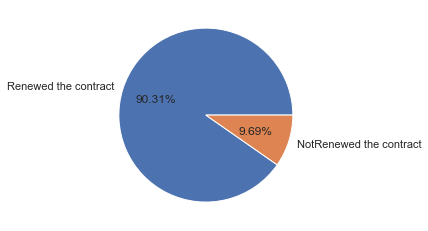

In [344]:
plt.pie(r,labels=['Renewed the contract','NotRenewed the contract'],autopct='%1.2f%%')
plt.show()

In [345]:
df.conrenew_flag.value_counts()

1    3010
0     323
Name: conrenew_flag, dtype: int64

In [346]:
# Observation 
## Nearly 3000 customers have renewed the Contract
## and about 323 customers have not renewed the Contract

## Analysis on Data plan

In [347]:
## 1->> Indicates that the customers has the plan on going 
## 0->> Indicates that the customers has no plan

In [348]:
sns.set_theme()

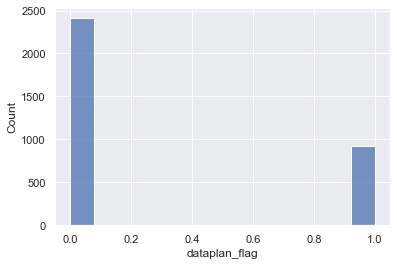

In [349]:
sns.histplot(df.dataplan_flag);

In [350]:
d=df.dataplan_flag.value_counts(normalize=True)
d

0    0.723372
1    0.276628
Name: dataplan_flag, dtype: float64

In [351]:
# Observation 
## About 72 % has no plan
## About 28 % has plan

In [352]:
# Observation 
## About 2411 customers have their Data Plan
## About 922 customers don't have their Data Plan

# Analysis on data_flag

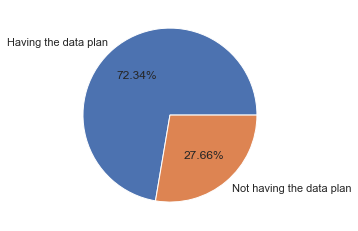

In [353]:
plt.pie(d,labels=['Having the data plan','Not having the data plan'],autopct='%1.2f%%')
plt.show()

# Analysis on calls to customer_service

In [354]:
df.num_cs_calls.value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
8       2
9       2
Name: num_cs_calls, dtype: int64

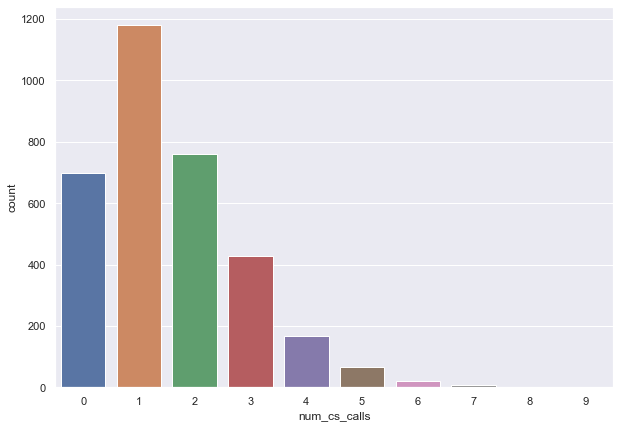

In [355]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='num_cs_calls');

In [356]:
# Observation
## The max number of calls to customer service is found to be 1 i.e, 1181
## followed by 2 calls which is of 759 times and so on

# Analysis on avg_talk_time in a Day

In [357]:
df['avg_talk_time'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: avg_talk_time, dtype: float64

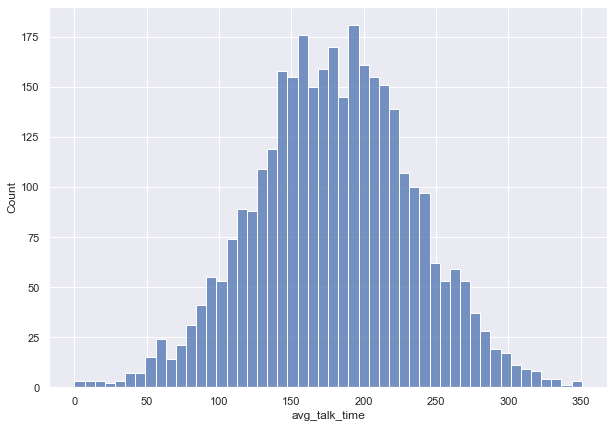

In [358]:
plt.figure(figsize=(10,7))
sns.histplot(df['avg_talk_time'],bins=50);

In [359]:
# Observation
## The maximum average talk time in a day is found out to be 350.8 minutes
## And the more number of average talk time in a day lies between 140 minutes and 230 minutes


# Analysis on average Calls made in day

In [360]:
df.avg_calls.describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: avg_calls, dtype: float64

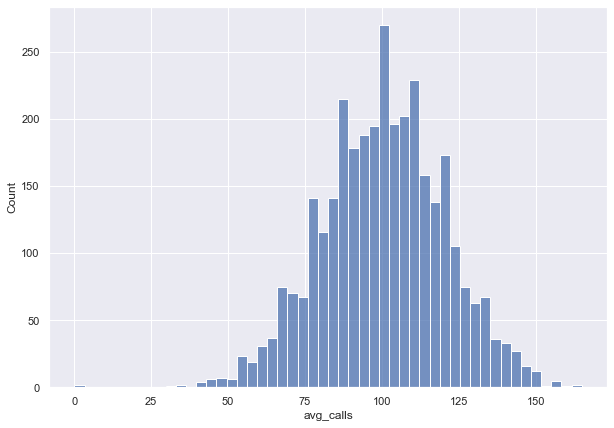

In [361]:
plt.figure(figsize=(10,7))
sns.histplot(df.avg_calls,bins=50);

In [362]:
# Observation 
## The maximum number of calls made in a day is found out to be 165
## The least number of calls made in a day is found out to be 0
## And the maximum number of calls in a day lies between the number 80 and 120

# Analysis on average monthly_bill

In [363]:
df.mth_bill.nunique()

627

In [364]:
df.mth_bill.describe()

count    3333.000000
mean       56.305161
std        16.426032
min        14.000000
25%        45.000000
50%        53.500000
75%        66.200000
max       111.300000
Name: mth_bill, dtype: float64

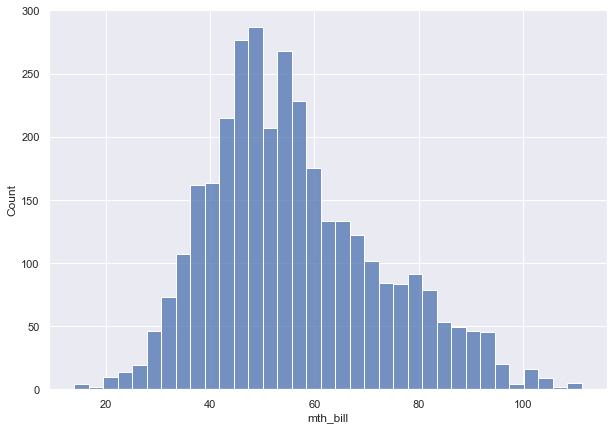

In [365]:
plt.figure(figsize=(10,7))
sns.histplot(df.mth_bill);

In [366]:
# Observation 
## The maximum average of monthly_bill is found out to be 111
## The minimum average of monthly_bill is found out to be 14
## And the most number of monthly_bill is fallen between 40 and 60

# Analysis on overagefee

In [367]:
df.overagefee.nunique()

1024

In [368]:
df.overagefee.describe()

count    3333.000000
mean       10.051488
std         2.535712
min         0.000000
25%         8.330000
50%        10.070000
75%        11.770000
max        18.190000
Name: overagefee, dtype: float64

In [369]:
df.overagefee.value_counts().max()

13

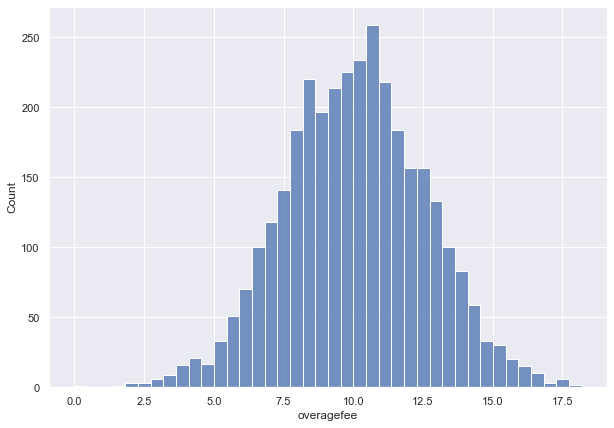

In [370]:
plt.figure(figsize=(10,7))
sns.histplot(df.overagefee);

In [371]:
# Observation
## The largest overagefee in the last 12 months is found 

# Analysis on Roaming_minutes

In [372]:
df.roam_mins.describe()

count    3333.000000
mean       10.237294
std         2.791840
min         0.000000
25%         8.500000
50%        10.300000
75%        12.100000
max        20.000000
Name: roam_mins, dtype: float64

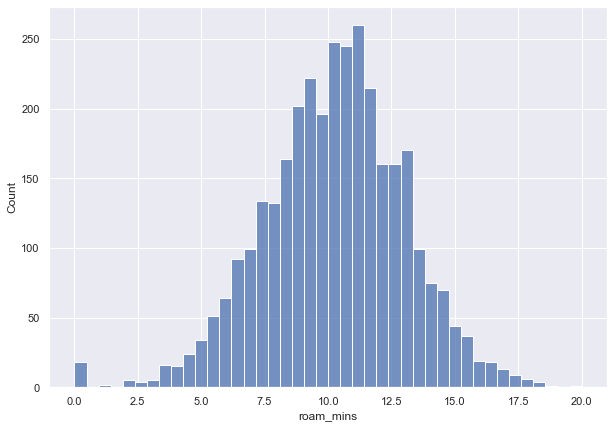

In [373]:
plt.figure(figsize=(10,7))
sns.histplot(df.roam_mins);

In [374]:
# Observation
## The maximum number of roaming minutes is found out to be 20 min
## The minimum number of roaming minutes is found out to be 00 min
## The more number of roaming minutes lies between 7.5 to 13 minutes

# Analysis on Churned and non-Churned Customers

In [375]:
df.churn_flag.value_counts()

0    2850
1     483
Name: churn_flag, dtype: int64

In [376]:
c=df.churn_flag.value_counts(normalize=True)
c

0    0.855086
1    0.144914
Name: churn_flag, dtype: float64

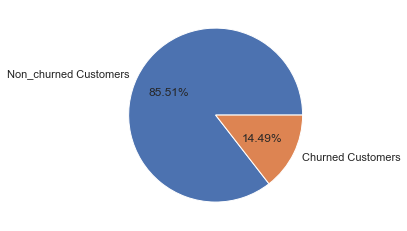

In [377]:
plt.pie(c,labels=['Non_churned Customers','Churned Customers'],autopct='%1.2f%%')
plt.show()

In [378]:
# Observation
## About 14% of the customers are have cancelled the Service
## And about 86% of the customers have not cancelled the Service

<AxesSubplot:xlabel='churn_flag', ylabel='avg_talk_time'>

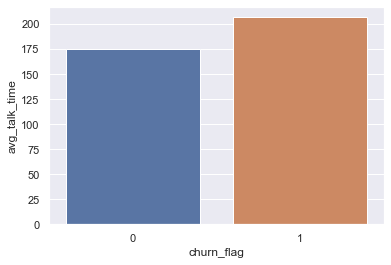

In [379]:
sns.barplot(data=df,x='churn_flag',y='avg_talk_time',ci=None)

# B. Observe Bi-variate distributions


In [380]:
df.head()

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0


Text(0, 0.5, 'conrenew_flag')

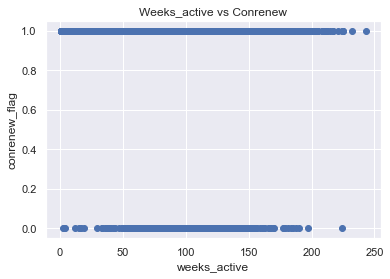

In [381]:
plt.scatter(df['weeks_active'],df['conrenew_flag'])
plt.title('Weeks_active vs Conrenew')
plt.xlabel('weeks_active')
plt.ylabel('conrenew_flag')

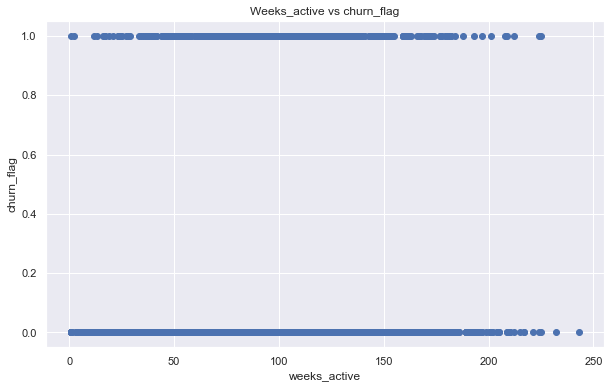

In [382]:
plt.figure(figsize=(10,6))
plt.scatter(df['weeks_active'],df['churn_flag'])
plt.title('Weeks_active vs churn_flag')
plt.xlabel('weeks_active')
plt.ylabel('churn_flag')
plt.show()

# Analysis on 'Weeks_active vs avg_talk_time'

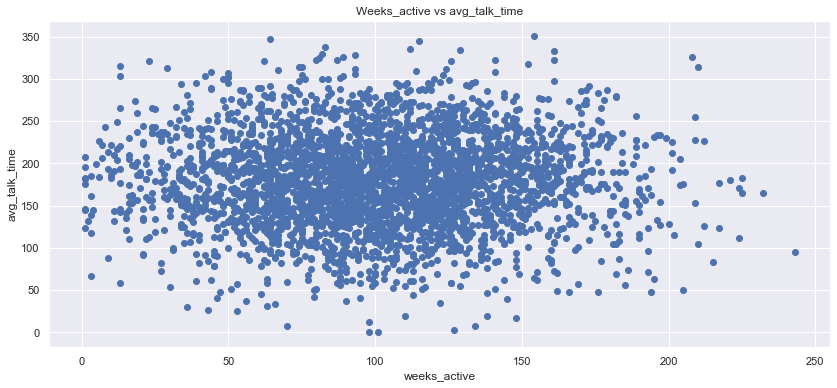

In [383]:
plt.figure(figsize=(14,6))
plt.scatter(df['weeks_active'],df['avg_talk_time'])
plt.title('Weeks_active vs avg_talk_time')
plt.xlabel('weeks_active')
plt.ylabel('avg_talk_time')
plt.show()

In [384]:
# Observation
## The more number of data points lies in the region 50 to 150 weeks
## As the weeks since the customer being active is increasing the the majority of the customers were found to decresing
## with their avg_talk_time is also decresing

In [385]:
# It indicates that the after 150 weeks the average talk time of the customers is dropping down along with the count of the customers

# Analysis on 'Weeks_active vs data_usage'

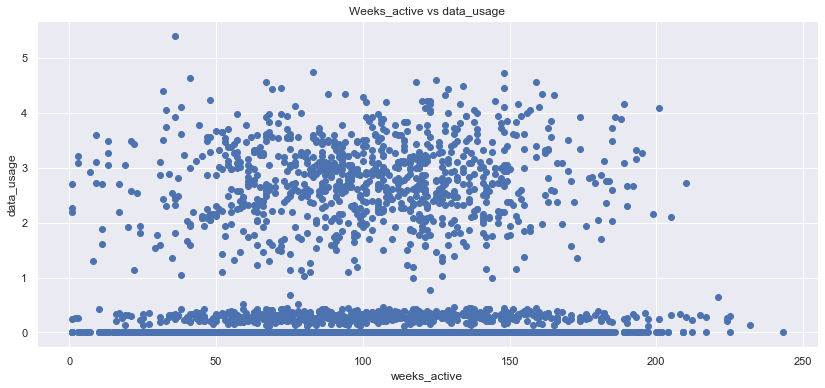

In [386]:
plt.figure(figsize=(14,6))
plt.scatter(df['weeks_active'],df['data_usage'])
plt.title('Weeks_active vs data_usage')
plt.xlabel('weeks_active')
plt.ylabel('data_usage')
plt.show()

In [387]:
# Observation
## As the weeks are increasing the more number of customers data usage was mainly inbetween 0 and 1 Gb
## also some of the cutomers have various usage of data along the weeks being active

In [388]:
df.head()

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='weeks_active', ylabel='avg_calls'>

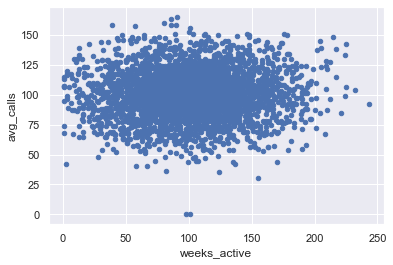

In [389]:
df.plot(kind='scatter',x='weeks_active',y='avg_calls')

# Analysis on 'Weeks_active vs avg_calls'

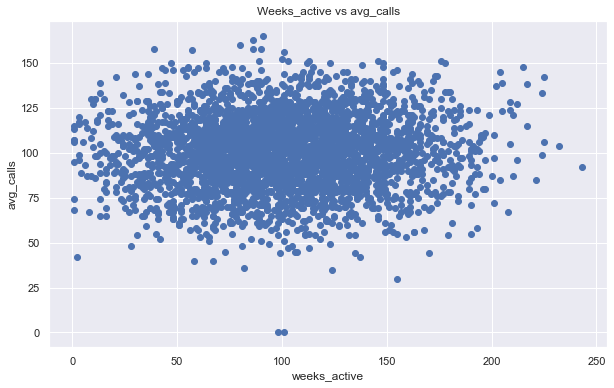

In [390]:
plt.figure(figsize=(10,6))
plt.scatter(df['weeks_active'],df['avg_calls'])
plt.title('Weeks_active vs avg_calls')
plt.xlabel('weeks_active')
plt.ylabel('avg_calls')
plt.show()

In [391]:
# Observation 
## The more number of data points lies in the region 50 to 150 weeks
## As the weeks since the customer being active is increasing then the majority of the customers were found to be decresing
## It indicates that the after 150 weeks the average talk time of the customers is dropping down
## along with the count of the customers

# Analysis on 'Weeks_active vs overagefee'

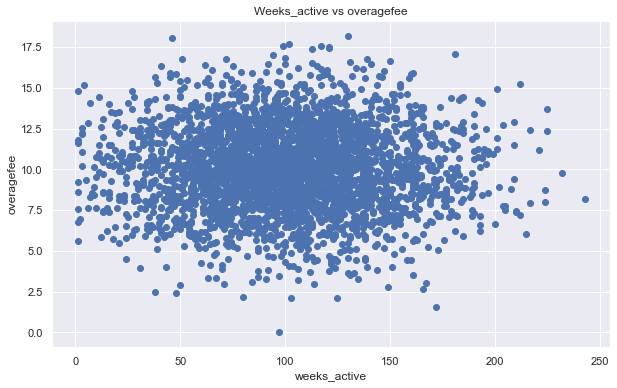

In [392]:
plt.figure(figsize=(10,6))
plt.scatter(df['weeks_active'],df['overagefee'])
plt.title('Weeks_active vs overagefee')
plt.xlabel('weeks_active')
plt.ylabel('overagefee')
plt.show()

In [393]:
# Observation
## The more number of data points lies in the region 60 to 140 weeks
## the maximum overagefee is found out to be around 18 and of at nearly of 130 weeks
## the overagefee is found out to be decreasing gradually after 140 weeks

In [394]:
df.overagefee.max()

18.19

In [395]:
df[(df.conrenew_flag==1) & (df.data_usage==0) & (df.weeks_active)>200]

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag


In [396]:
df[df['data_usage']<=1]

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1,0
5,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3,0
7,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1,0
...,...,...,...,...,...,...,...,...,...,...,...
3326,96,1,0,0.36,1,106.6,128,46.6,14.24,14.9,0
3327,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8,0
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6,0
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1,0


In [397]:
df['data_usage'].value_counts()

0.00    1813
0.31      41
0.21      39
0.29      36
0.26      34
        ... 
4.13       1
4.59       1
0.68       1
4.29       1
4.64       1
Name: data_usage, Length: 174, dtype: int64

In [398]:
# Observation
## Nearly  2420 customers uses less than 1 Gb even when the weeks_active is increasing
## Most of the data points are concentrated in the region between 50 and 150 weeks
## During this the more number of customers were using between 3 and 4 Gb
## After 150 weeks the customers using the data between 3 and 4 Gb is significantly dropping down 
## After 200 weeks their is more number of customers who have used the data

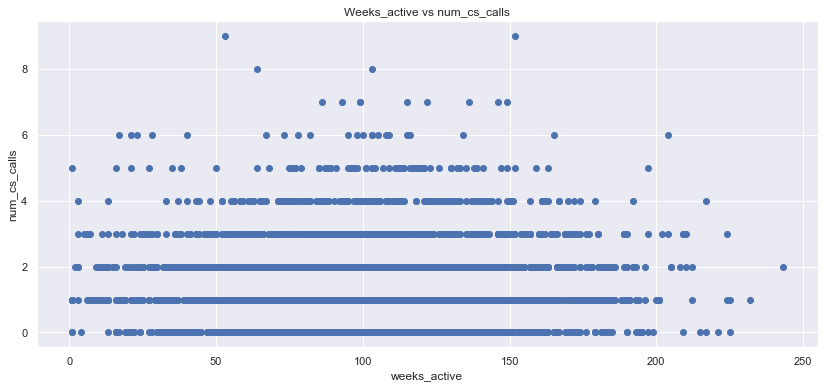

In [399]:
plt.figure(figsize=(14,6))
plt.scatter(df['weeks_active'],df['num_cs_calls'])
plt.title('Weeks_active vs num_cs_calls')
plt.xlabel('weeks_active')
plt.ylabel('num_cs_calls')
plt.show()

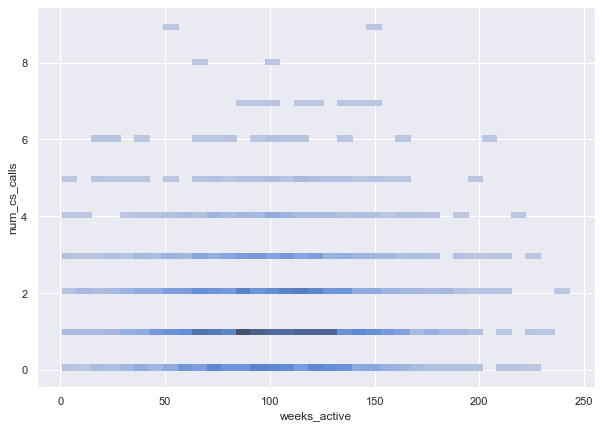

In [400]:
plt.figure(figsize=(10,7))
sns.histplot(data=df,x='weeks_active',y='num_cs_calls');

# Phase 2 Deliverables

In [401]:
# 1. Compute the below metrics for both Churned and Active customers and comment on any significant difference
# 1. Avg. number of calls
# 2. Avg. talk time
# 3. Avg. monthly bill amount
# 4. Avg. overall fee
# 5. Avg. number of weeks active

In [402]:
df.head()

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0


# CHURNED CUSTOMERS

In [403]:
churn_c=df[df.churn_flag==1]
churn_c

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
10,65,1,0,0.29,4,129.1,137,44.9,11.43,12.7,1
15,161,1,0,0.00,4,332.9,67,84.0,15.89,5.4,1
21,77,1,0,0.00,5,62.4,89,26.0,8.50,5.7,1
33,12,1,0,0.00,1,249.6,118,64.0,12.62,11.8,1
41,135,0,1,3.94,0,173.1,85,86.4,10.20,14.6,1
...,...,...,...,...,...,...,...,...,...,...,...
3301,84,1,0,0.00,0,280.0,113,65.0,10.11,10.4,1
3304,71,0,0,0.00,4,186.1,114,49.0,9.93,13.8,1
3320,122,0,0,0.30,4,140.0,101,44.0,9.82,9.7,1
3322,62,1,0,0.00,4,321.1,105,78.0,13.28,11.5,1


In [404]:
churn_c.shape

(483, 11)

In [405]:
churn_c.num_cs_calls.value_counts(normalize=True,ascending=False)

1    0.252588
0    0.190476
2    0.180124
4    0.157350
3    0.091097
5    0.082816
6    0.028986
7    0.010352
9    0.004141
8    0.002070
Name: num_cs_calls, dtype: float64

# Non-Churned Customers

In [406]:
non_c=df[df.churn_flag==0]
non_c

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1,0
...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9,0
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6,0
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1,0
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0,0


In [407]:
non_c.shape

(2850, 11)

## 1.Avg. number of calls
## churned

In [408]:
churn_c.avg_calls.value_counts()

106    16
108    14
120    12
103    12
105    11
       ..
55      1
53      1
47      1
45      1
165     1
Name: avg_calls, Length: 98, dtype: int64

In [409]:
churn_c.avg_calls.describe()

count    483.000000
mean     101.335404
std       21.582307
min        0.000000
25%       87.500000
50%      103.000000
75%      116.500000
max      165.000000
Name: avg_calls, dtype: float64

F:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


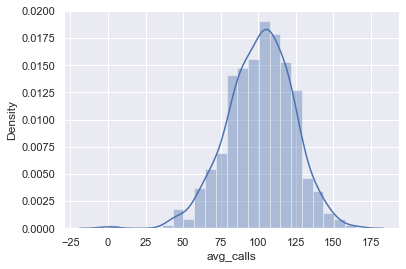

In [410]:
sns.distplot(churn_c.avg_calls);

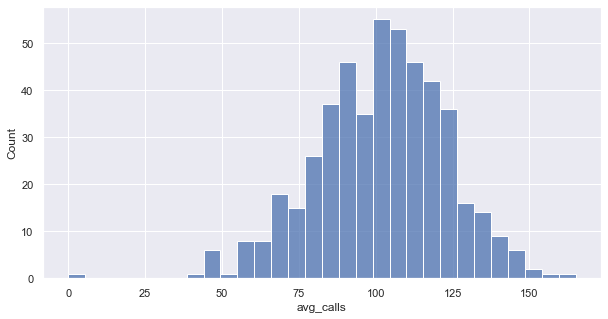

In [411]:
plt.figure(figsize=(10,5))
sns.histplot(churn_c.avg_calls,bins=30);

In [412]:
# Observation
## For the churned customers on average highest number calls made in a day is found out to be 165
## minimum calls is 0
## more number of calls are done between 85 and 125 
## mean is found out to be 101 calls
## 75 % of the churned customers has less than 116 average calls in a day
## 50 % of the churned customers has less than 103 average calls in a day

## Avg. number of calls
## Non-churned

In [413]:
non_c.avg_calls.value_counts()

102    72
107    66
105    64
88     61
97     60
       ..
48      1
44      1
42      1
36      1
163     1
Name: avg_calls, Length: 117, dtype: int64

In [414]:
non_c[non_c.avg_calls==105]

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
31,75,1,0,0.00,1,226.1,105,56.0,10.08,10.3,0
66,43,0,0,0.00,0,251.5,105,61.0,10.64,9.3,0
170,68,1,0,0.00,1,237.1,105,60.0,11.18,13.2,0
204,157,1,0,0.00,1,152.7,105,48.0,12.88,9.4,0
270,101,1,0,0.00,0,206.6,105,55.0,11.25,14.6,0
...,...,...,...,...,...,...,...,...,...,...,...
3251,88,1,0,0.00,2,274.6,105,61.0,8.06,9.2,0
3254,57,1,1,3.97,1,179.2,105,94.7,14.16,14.7,0
3286,106,1,1,3.54,0,220.1,105,92.4,11.11,13.1,0
3288,78,1,0,0.17,1,109.5,105,44.7,14.31,4.9,0


In [415]:
non_c.avg_calls.describe()

count    2850.000000
mean      100.283158
std        19.801157
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       163.000000
Name: avg_calls, dtype: float64

F:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


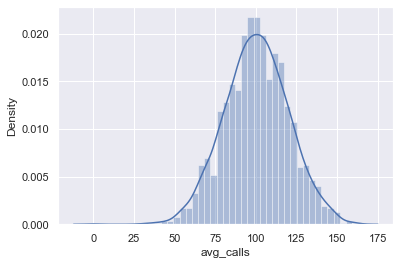

In [416]:
sns.distplot(non_c.avg_calls);

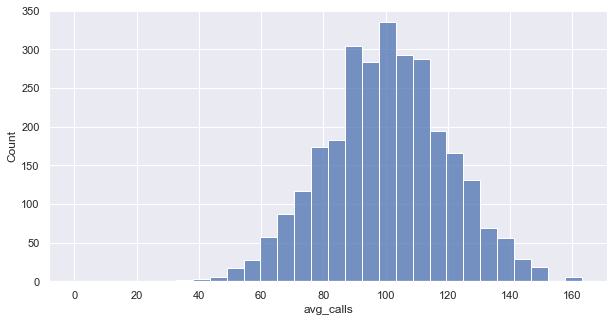

In [417]:
plt.figure(figsize=(10,5))
sns.histplot(non_c.avg_calls,bins=30);

In [418]:
# Observation
## For the Non-churned customers on average highest number calls made in a day is found out to be 163
## minimum calls is 0
## more number of calls are done between 85 and 115
## mean is found out to be 100 calls
## 75 % of the Non-churned customers has less than 114 average calls in a day
## 50 % of the Non-churned customers has less than 100 average calls in a day

## 2. Avg. talk time
### churned
Minutes in a day

In [419]:
churn_c.avg_talk_time.describe()

count    483.000000
mean     206.914079
std       68.997792
min        0.000000
25%      153.250000
50%      217.600000
75%      265.950000
max      350.800000
Name: avg_talk_time, dtype: float64

F:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


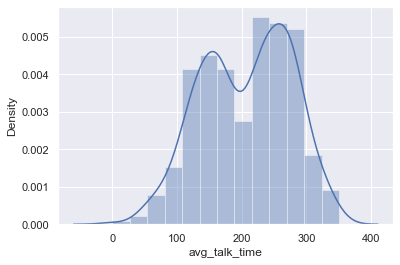

In [420]:
sns.distplot(churn_c.avg_talk_time);

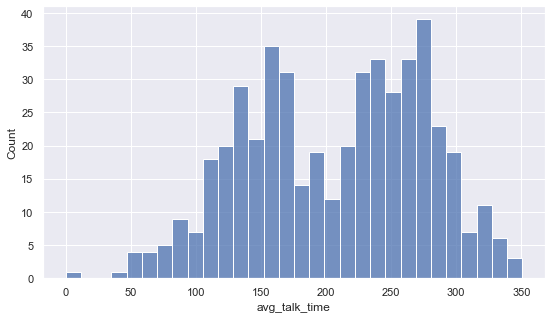

In [421]:
plt.figure(figsize=(9,5))
sns.histplot(data=churn_c,x='avg_talk_time',bins=30);

In [422]:
# It is bimodal

In [423]:
# Observation
## The highest average talktime of Churned customers is 350 minutes
## The minimum average talktime of Churned customers is 0 minutes
## The major part of average talktime of Churned customers is in between 220 and 290 minutes
## 50 % of Churned customers has less than 217 mins of average talk time in a day
## 75 % of Churned customers has less than 265 mins of average talk time in a day

## Avg. talk time 
### Non-churned
Minutes in a day

In [424]:
non_c.avg_talk_time.describe([0.1,0.2,0.3,0.4,0.75,0.99])

count    2850.000000
mean      175.175754
std        50.181655
min         0.000000
10%       109.490000
20%       134.200000
30%       149.800000
40%       163.500000
50%       177.200000
75%       210.300000
99%       282.708000
max       315.600000
Name: avg_talk_time, dtype: float64

In [425]:
sns.set_theme()

F:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


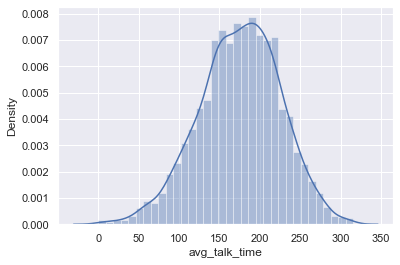

In [426]:
sns.distplot(non_c.avg_talk_time);

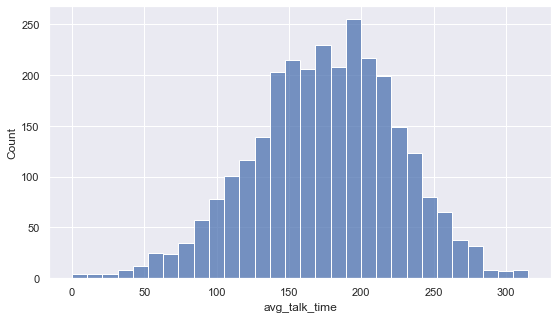

In [427]:
plt.figure(figsize=(9,5))
sns.histplot(data=non_c,x='avg_talk_time',bins=30);

In [428]:
# Observation
## The highest average talktime of Non-Churned customers is 315 minutes
## The minimum average talktime of Non-Churned customers is 0 minutes
## The major part of average talktime of Churned customers is in between 130 and 230 minutes
## 50 % of Non-Churned customers has less than 177 mins of average talk time in a day
## 75 % of Non-Churned customers has less than 210 mins of average talk time in a day

<AxesSubplot:xlabel='churn_flag', ylabel='avg_talk_time'>

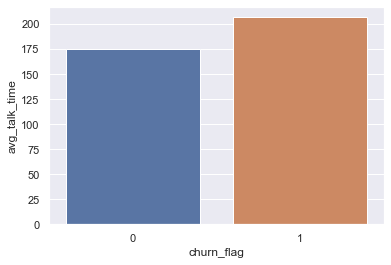

In [429]:
sns.barplot(x='churn_flag',y='avg_talk_time',data=df,ci=None)

## 3. Avg. monthly bill amount
### Churned

In [430]:
churn_c.mth_bill.value_counts()

65.0     24
63.0     20
64.0     17
68.0     13
41.0     13
         ..
86.9      1
20.1      1
29.0      1
91.9      1
100.3     1
Name: mth_bill, Length: 181, dtype: int64

In [431]:
churn_c.mth_bill.describe()

count    483.000000
mean      59.190062
std       16.065479
min       14.000000
25%       45.000000
50%       63.000000
75%       69.000000
max      110.000000
Name: mth_bill, dtype: float64

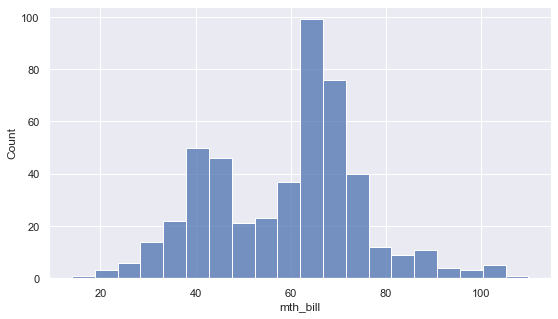

In [432]:
plt.figure(figsize=(9,5))
sns.histplot(data=churn_c,x='mth_bill',bins=20);

In [433]:
# Observation
## The highest average monthly bill for Churned customer is 110
## The lowest average monthly bill for Churned customer is 14
## More number of Churned customers are populated in the monthly bill of 64 followed by 63

## Avg. monthly bill amount
### Non-Churned

In [434]:
non_c.mth_bill.value_counts()

50.0     83
46.0     70
54.0     68
49.0     68
51.0     66
         ..
77.2      1
34.5      1
66.6      1
84.6      1
103.8     1
Name: mth_bill, Length: 596, dtype: int64

In [435]:
non_c.mth_bill.describe()

count    2850.000000
mean       55.816246
std        16.439011
min        15.700000
25%        45.000000
50%        53.000000
75%        64.675000
max       111.300000
Name: mth_bill, dtype: float64

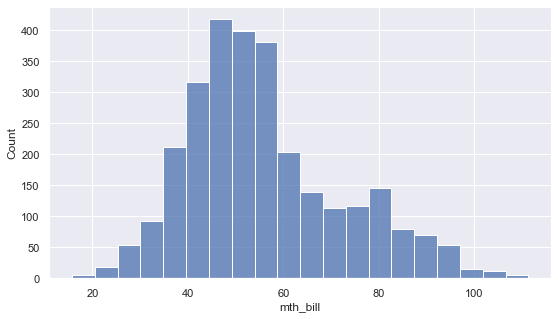

In [436]:
plt.figure(figsize=(9,5))
sns.histplot(data=non_c,x='mth_bill',bins=20);

In [437]:
# Observation
## The highest average monthly bill for Churned customer is 111
## The lowest average monthly bill for Churned customer is 15
## More number of Churned customers are populated in the monthly bill of 50 followed by 46,54,49,51
## The more number of the Non-churned customers has the average montly bill in the range of 40 and 60

## 4. Avg. overall fee
### Churned

In [438]:
churn_c.overagefee.value_counts()

11.31    4
10.57    4
10.42    4
10.29    3
11.06    3
        ..
4.41     1
9.11     1
7.07     1
14.09    1
8.60     1
Name: overagefee, Length: 383, dtype: int64

In [439]:
churn_c.overagefee.describe()

count    483.000000
mean      10.623085
std        2.586433
min        3.550000
25%        8.860000
50%       10.570000
75%       12.475000
max       18.190000
Name: overagefee, dtype: float64

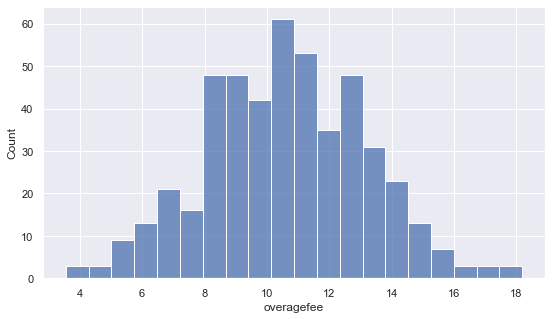

In [440]:
plt.figure(figsize=(9,5))
sns.histplot(data=churn_c,x='overagefee',bins=20);

In [441]:
# Observation 
## The maximum overagefee is found out to be 18.19
## The minimum overagefee is found out to be 3.55
## The most population falls in 11.31 -->4 10.57 --->4 10.42 -->4
## The most number of Churned customers has overagefee in the range between 8 and 13


## Avg. overall fee
### Non-Churned

In [442]:
non_c.overagefee.value_counts()

8.09     11
8.36     10
8.50     10
10.19    10
10.26    10
         ..
4.10      1
13.62     1
14.07     1
5.99      1
0.00      1
Name: overagefee, Length: 977, dtype: int64

In [443]:
non_c.overagefee.describe()

count    2850.000000
mean        9.954618
std         2.514629
min         0.000000
25%         8.230000
50%         9.980000
75%        11.660000
max        18.090000
Name: overagefee, dtype: float64

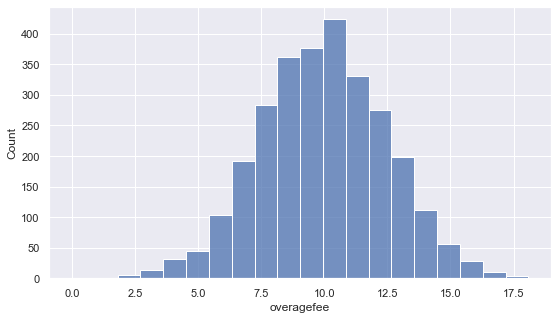

In [444]:
plt.figure(figsize=(9,5))
sns.histplot(data=non_c,x='overagefee',bins=20);

In [445]:
# Observation 
## The maximum overagefee is found out to be 18.09
## The minimum overagefee is found out to be 00.00
## The most population falls in 11.31-->4 10.57--->4 10.42--->4 10.29-->3 11.06--->3
## The most number of non-Churned customers has overagefee in the range between 7.5 and 12.5

## 5. Avg. number of weeks active
### Churned


In [446]:
churn_c.weeks_active.value_counts()

105    9
119    9
93     8
115    8
113    8
      ..
104    1
114    1
140    1
141    1
225    1
Name: weeks_active, Length: 164, dtype: int64

In [447]:
churn_c.weeks_active.describe()

count    483.000000
mean     102.664596
std       39.467820
min        1.000000
25%       76.000000
50%      103.000000
75%      127.000000
max      225.000000
Name: weeks_active, dtype: float64

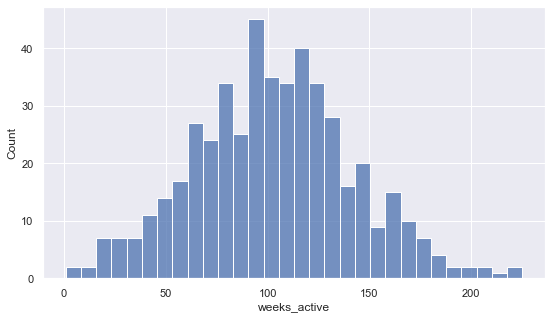

In [448]:
plt.figure(figsize=(9,5))
sns.histplot(data=churn_c,x='weeks_active',bins=30);

In [449]:
# Observation
## The max week since the Churned customer has been active is 255 weeks
## The min  week since the Churned customer has been active is 1 week
## Most of the Churned customers that has been active falls in the range of 50 to 140 weeks
## After 125 weeks the customers number is falling gradually

## Avg. number of weeks active
### Non-Churned

In [450]:
non_c.weeks_active.value_counts()

87     39
90     37
86     36
101    35
105    34
       ..
202     1
200     1
26      1
8       1
243     1
Name: weeks_active, Length: 209, dtype: int64

In [451]:
non_c.weeks_active.describe()

count    2850.000000
mean      100.793684
std        39.882350
min         1.000000
25%        73.000000
50%       100.000000
75%       127.000000
max       243.000000
Name: weeks_active, dtype: float64

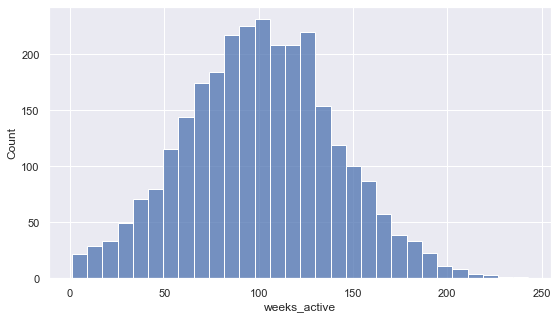

In [452]:
plt.figure(figsize=(9,5))
sns.histplot(data=non_c,x='weeks_active',bins=30);

In [453]:
# Observation
## The max week since the Churned customer has been active is 243 weeks
## The min  week since the Churned customer has been active is 1 week
## Most of the Churned customers that has been active falls in the range of 50 to 140 weeks
## After 125 weeks the customers number is falling gradually

## 2. Observe the ‘Churn Rate’ on different flag variables (such as conrenew_flag, dataplan_flag)

In [454]:
import numpy as np

In [455]:
df.churn_flag.value_counts()

0    2850
1     483
Name: churn_flag, dtype: int64

In [456]:
df.churn_flag.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn_flag, dtype: float64

#### 14.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt.

In [457]:
churn_c.loc[:,'conrenew_flag':'dataplan_flag']

,conrenew_flag,dataplan_flag
10,1,0
15,1,0
21,1,0
33,1,0
41,0,1
...,...,...
3301,1,0
3304,0,0
3320,0,0
3322,1,0


In [458]:
df['churn_flag'].value_counts()

0    2850
1     483
Name: churn_flag, dtype: int64

In [459]:
l=['conrenew_flag','dataplan_flag']

In [460]:
df.groupby('churn_flag')[l].mean()

,conrenew_flag,dataplan_flag
churn_flag,,
0,0.934737,0.295439
1,0.716356,0.165631


In [461]:
# Observation
## About 71.5 % of the churned customers have renewed the contract
## About 16.5 % of the churned customers have renewed the data 

## 3. What kind of relationship ‘Churn Rate’ has with different numerical variables? Use suitable plots to show these results and report your findings.
For discrete variables(numeric in nature but with low number of unique values) applying binning to create bins with sufficient 
and equitable number of data points to observe this relationship (use a different plot type than continuous variables)


In [462]:
df.groupby('churn_flag').agg([np.mean, np.std, np.min, np.max])

weeks_active                     conrenew_flag                      \
                   mean       std amin amax          mean       std amin amax   
churn_flag                                                                      
0            100.793684  39.88235    1  243      0.934737  0.247033    0    1   
1            102.664596  39.46782    1  225      0.716356  0.451233    0    1   

           dataplan_flag            ... mth_bill        overagefee            \
                    mean       std  ...     amin   amax       mean       std   
churn_flag                          ...                                        
0               0.295439  0.456320  ...     15.7  111.3   9.954618  2.514629   
1               0.165631  0.372135  ...     14.0  110.0  10.623085  2.586433   

                         roam_mins                       
            amin   amax       mean       std amin  amax  
churn_flag                                               
0           0.00  18.09  10.158877  2.784489  0.0  18.9  
1           3.55  18.19  10.700000  2.793190  2.0  20.0  

[2 rows x 40 columns]

# 4. For the two set of customers (conrenew_flag=1 and conrenew_flag=0) observe the
distribution of below numeric variables and report any significant difference:
1. Weeks Active
2. Avg. talk time
3. Avg. calls
4. Monthly bill

In [463]:
ll=[df.columns]
ll

[Index(['weeks_active', 'conrenew_flag', 'dataplan_flag', 'data_usage',
        'num_cs_calls', 'avg_talk_time', 'avg_calls', 'mth_bill', 'overagefee',
        'roam_mins', 'churn_flag'],
       dtype='object')]

In [464]:
ll=['weeks_active', 'dataplan_flag', 'data_usage','num_cs_calls', 'avg_talk_time', 'avg_calls', 'mth_bill', 'overagefee','roam_mins', 'churn_flag']
ll

['weeks_active',
 'dataplan_flag',
 'data_usage',
 'num_cs_calls',
 'avg_talk_time',
 'avg_calls',
 'mth_bill',
 'overagefee',
 'roam_mins',
 'churn_flag']

In [465]:
df.groupby('conrenew_flag')[ll].agg([np.mean, np.std, np.min, np.max])

weeks_active                      dataplan_flag                 \
                      mean        std amin amax          mean       std amin   
conrenew_flag                                                                  
0               104.071207  38.363388    2  224      0.284830  0.452034    0   
1               100.742193  39.968207    1  243      0.275748  0.446964    0   

                   data_usage            ... overagefee         roam_mins  \
              amax       mean       std  ...       amin   amax       mean   
conrenew_flag                            ...                                
0                1   0.891146  1.369482  ...       3.04  18.19  10.628173   
1                1   0.808462  1.261818  ...       0.00  18.09  10.195349   

                                   churn_flag                      
                    std amin  amax       mean       std amin amax  
conrenew_flag                                                      
0              2.697787  1.3  20.0   0.424149  0.494980    0    1  
1              2.798937  0.0  18.9   0.114950  0.319015    0    1  

[2 rows x 40 columns]

In [466]:
conren=df[df.conrenew_flag==1]
conren.shape

(3010, 11)

In [467]:
conren

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2,0
6,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5,0
8,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7,0
...,...,...,...,...,...,...,...,...,...,...,...
3327,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8,0
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9,0
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6,0
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1,0


In [468]:
churn_c.conrenew_flag.value_counts(normalize=True)

1    0.716356
0    0.283644
Name: conrenew_flag, dtype: float64

In [469]:
# 72% of the churned customers had contract renewed
# 28% of the non- churned customers had contract renewed
## why does the most number of churned customers have their contract renewed??
## This means there is some problem there are facing after their renewed the contract 
## maybe there is some signal issues or network issues or customer service call quality has decreased

In [470]:
churn_c.dataplan_flag.value_counts(normalize=True)

0    0.834369
1    0.165631
Name: dataplan_flag, dtype: float64

In [471]:
# About 16.5 % of the churned customers have renewed the data
## This means most of the customers who are churning has no data plan why ??
## They did'nt have data plan because other telecoms might be providing with better data plans and customers considered to churn

In [472]:
df.head()

,weeks_active,conrenew_flag,dataplan_flag,data_usage,num_cs_calls,avg_talk_time,avg_calls,mth_bill,overagefee,roam_mins,churn_flag
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0


# 3

In [473]:
churn_c.num_cs_calls.value_counts(normalize=True)

1    0.252588
0    0.190476
2    0.180124
4    0.157350
3    0.091097
5    0.082816
6    0.028986
7    0.010352
9    0.004141
8    0.002070
Name: num_cs_calls, dtype: float64

In [474]:
# 56% of the churned customers had to call more than once 
# why?
## The telecom might not be providing a smooth experience and this lead to customers churning

# conrenew_flag=1 Weeks Active 


F:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


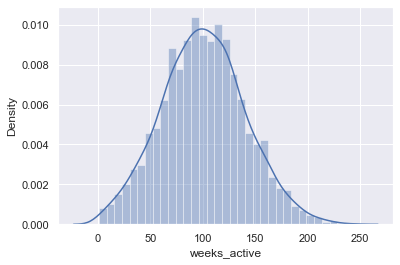

In [475]:
sns.distplot(conren.weeks_active);

# conrenew_flag=0 Weeks Active

F:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


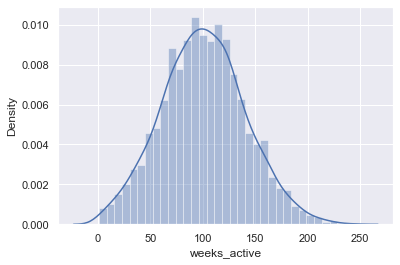

In [476]:
sns.distplot(conren.weeks_active);

F:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_talk_time', ylabel='Density'>

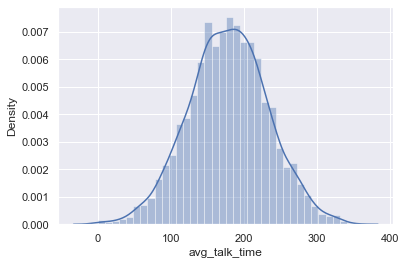

In [477]:
sns.distplot(conren.avg_talk_time)

F:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_calls', ylabel='Density'>

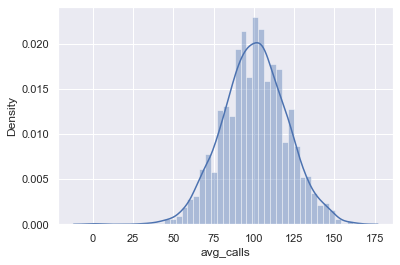

In [478]:
sns.distplot(conren.avg_calls)

F:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mth_bill', ylabel='Density'>

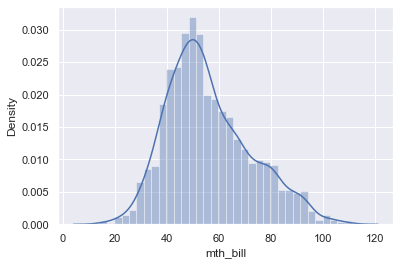

In [479]:
sns.distplot(conren.mth_bill)

F:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_cs_calls', ylabel='Density'>

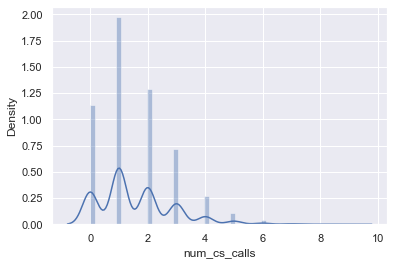

In [480]:
sns.distplot(conren.num_cs_calls)